<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 notebook to Explore Conditional Probability using FACTS output <br>
 <span style="font-size: 12pt; color: black;"> by Praveen Kumar and Bob Kopp </span>
</p>

<hr style="border: none; height: 2px; background-color: blue; border-style: dotted;">

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML, Video
import cond_dist as cd

Projecting sea level requires integrating contributions from Ice sheets, glaciers, ocean models, and population dynamics, accounting for emissions.  

These frameworks exist mainly as Earth System Models, however, 
1. they are computationally demanding. 
1. often only offer single deterministic projections. 

_A complementary approach_ involves using emulators, Framework for Assessing Changes To Sea-level (**FACTS**) can be thought of as an emulator-based approach for probabilistic projections of sea-level. 
- an assessment tool to help users understand how sea levels could respond to future climate variability.
- open-source sea-level projection software library.
- It is designed to emulate detailed, process-based analyses of individual sea-level contributions and coupled projections made with Earth System Models.

Within FACTS, Relative SL is obtained by aggregating probability distributions from individual drivers, including ice sheets, glaciers, land water storage, and sterodynamic processes.

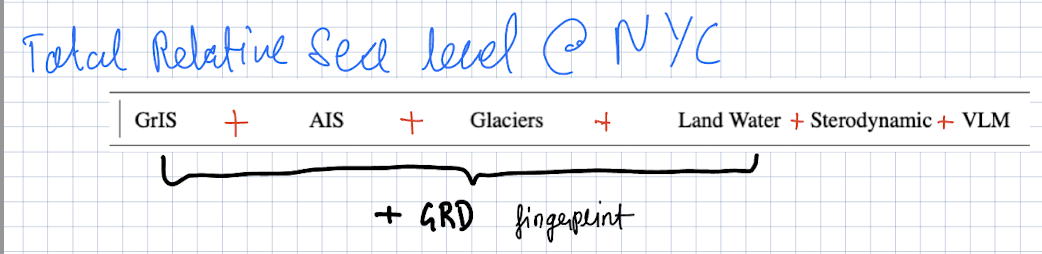

In [2]:
display(Image('./_IP_fig/RSL.png'))

- **Sterodynamic** sea level is estimated based on the correlation between thermal expansion (derived from GSAT and OHC; FaIR) and local dynamic sea level in the CMIP6 multimodel ensemble.
- **VLM** long-term contributions from vertical land motion 

<hr style="border: none; height: 2px; background-color: blue; border-style: dotted;">

**FACTS can be run conditional upon specified modeling assumptions.**
and each assumption is called a workflow


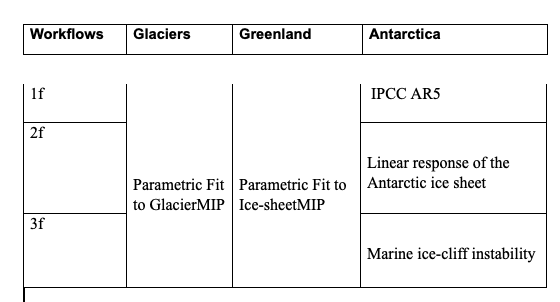

In [3]:
display(Image('./_IP_fig/workflow.png'))

<hr style="border: none; height: 2px; background-color: blue; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Read Data:: <span style="font-size: 8pt; color: black;"> <i>FACTS 1.1.1</i></span>
</span>


In [4]:
path = os.path.expanduser(f'~/werk.M2/0000_facts-OPdata.M2/amarel/ar2208/factsv1.1.1/coupling.ssp245/output/')

# !-----------------------------------------------------------------!
Yr1=2030 # Xaxis (Vary ; 2030component)
dat1a='coupling.ssp245.total.workflow.wf2f.local.nc'
dat1b='coupling.ssp245.total.workflow.wf2f.global.nc'
dat1c='coupling.ssp245.ocean.tlm.sterodynamics_globalsl.nc'
dat1d='coupling.ssp245.ocean.tlm.sterodynamics_localsl.nc'
dat1e='coupling.ssp245.larmip.larmip.AIS_globalsl.nc'

# !---!
Yr2=2100 # Yaxis (fixed ; NYC RSL 2100)
dat2='coupling.ssp245.total.workflow.wf2f.local.nc' 

# !-----------------------------------------------------------------!
INdata1a, datNMEa  = cd.prepData(path, dat1a, dat2, Yr1, Yr2)
INdata1b, datNMEb  = cd.prepData(path, dat1b, dat2, Yr1, Yr2)
INdata1c, datNMEc  = cd.prepData(path, dat1c, dat2, Yr1, Yr2)
INdata1d, datNMEd  = cd.prepData(path, dat1d, dat2, Yr1, Yr2)
INdata1e, datNMEe  = cd.prepData(path, dat1e, dat2, Yr1, Yr2)
print('... Done')

... Done


<hr style="border: none; height: 2px; background-color: red; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: red;">
    NYC total SL in 2100 conditional on
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: red;">
    <li>2030 RSL observations TOTAL </li>
    <li>2030 GMSL observation TOTAL </li>
    <li>2030 Thermal Expansion</li>
    <li>2030 Sterodynamic observations</li>
    <li>2030 AIS component</li>
</ol>

<hr style="position: absolute; left: 1.5; width: 50%; height: 2px; background-color: blue; border-style: solid;"><br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Plot:: raw data / samples
</span>


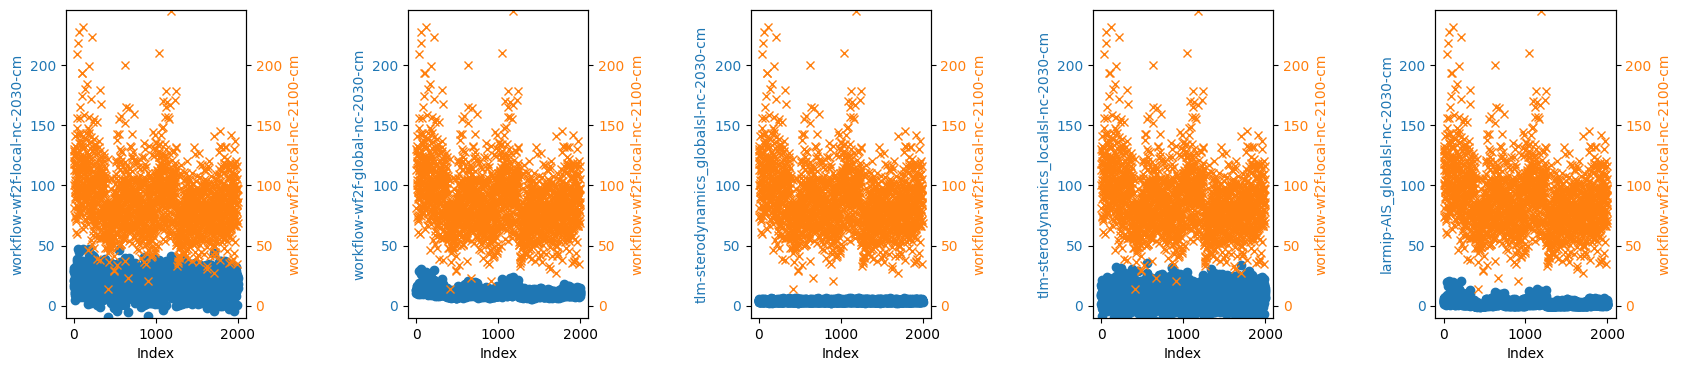

In [5]:
cd.PLOTraw([INdata1a,INdata1b,INdata1c,INdata1d,INdata1e],
           [datNMEa,datNMEb,datNMEc,datNMEd,datNMEe])

<hr style="position: absolute; left: 1.5; width: 50%; height: 2px; background-color: blue; border-style: solid;"><br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Plot:: Scatter
</span>

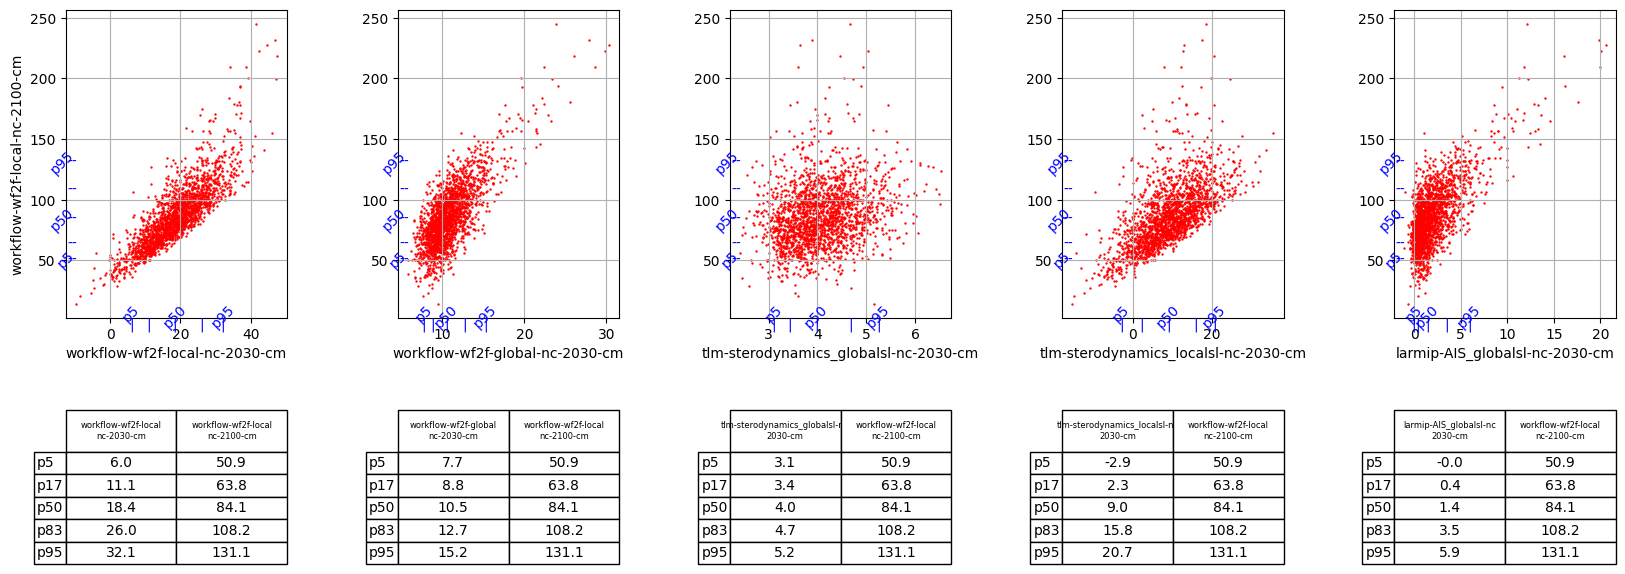

In [6]:
cd.PLOTscatter([INdata1a,INdata1b,INdata1c,INdata1d,INdata1e],
               [datNMEa,datNMEb,datNMEc,datNMEd,datNMEe])

<hr style="position: absolute; left: 1.5; width: 50%; height: 2px; background-color: blue; border-style: solid;"><br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Compute:: KDE
</span>
<p> KDE estimates the joint probability density function 
𝑃(𝑋,𝑌) for the data. <br>
When you evaluate KDE on a grid of X and Y values, you get a matrix where each element represents the joint density at that specific (X, Y) point.<br>  
density_values: This is the joint density estimate 𝑃 ( 𝑋 , 𝑌 ) , computed by evaluating the KDE on the entire grid of (Xgrid, Ygrid) points.<br>  
After normalization, each column represents a probability distribution over Y, given a fixed X:<br>  
normalized_density_values represents the entire conditional distribution matrix 𝑃 ( 𝑌 ∣ 𝑋 ) over all evaluated X values.<br>
</p>


In [7]:
normalized_density_values1a, density_values1a, xgrid1a, ygrid1a, xp1a, yp1a = cd.COMPkde(INdata1a)
normalized_density_values1b, density_values1b, xgrid1b, ygrid1b, xp1b, yp1b = cd.COMPkde(INdata1b)
normalized_density_values1c, density_values1c, xgrid1c, ygrid1c, xp1c, yp1c = cd.COMPkde(INdata1c)
normalized_density_values1d, density_values1d, xgrid1d, ygrid1d, xp1d, yp1d = cd.COMPkde(INdata1d)
normalized_density_values1e, density_values1e, xgrid1e, ygrid1e, xp1e, yp1e = cd.COMPkde(INdata1e)

Optimal bandwidth: 3.35  ||  num_values 109  ||  KDE eval  xgrid: 40  ::  ygrid: 160
Optimal bandwidth: 3.62  ||  num_values 109  ||  KDE eval  xgrid: 20  ::  ygrid: 180
Optimal bandwidth: 3.88  ||  num_values 114  ||  KDE eval  xgrid: 5  ::  ygrid: 195
Optimal bandwidth: 3.71  ||  num_values 118  ||  KDE eval  xgrid: 37  ::  ygrid: 163
Optimal bandwidth: 3.96  ||  num_values 118  ||  KDE eval  xgrid: 18  ::  ygrid: 182


<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    PLOT:: KDE
</span>

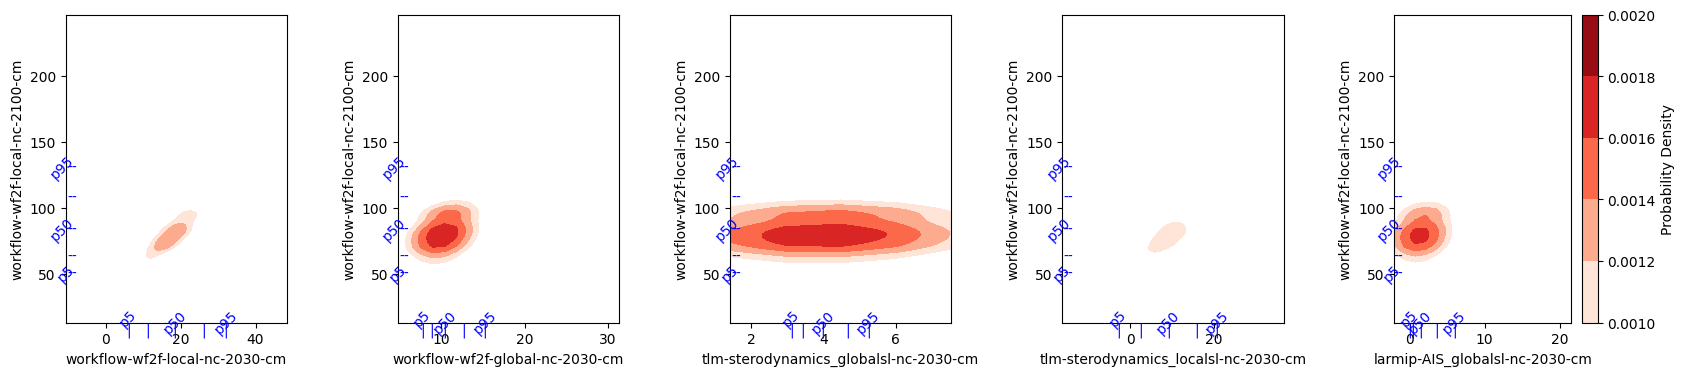

In [8]:
import cond_dist as cd
cd.PLOTkde([density_values1a, density_values1b, density_values1c, density_values1d, density_values1e], 
           [xgrid1a, xgrid1b, xgrid1c, xgrid1d, xgrid1e], 
           [ygrid1a, ygrid1b, ygrid1c, ygrid1d, ygrid1e],
           [xp1a, xp1b, xp1c, xp1d, xp1e],
           [yp1a,yp1b,yp1c,yp1d,yp1e],
           [datNMEa,datNMEb,datNMEc,datNMEd,datNMEe], 
            np.linspace(0.001, 0.002, 6))

<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    PLOT:: normalized KDE (conditional distributions.)
</span>

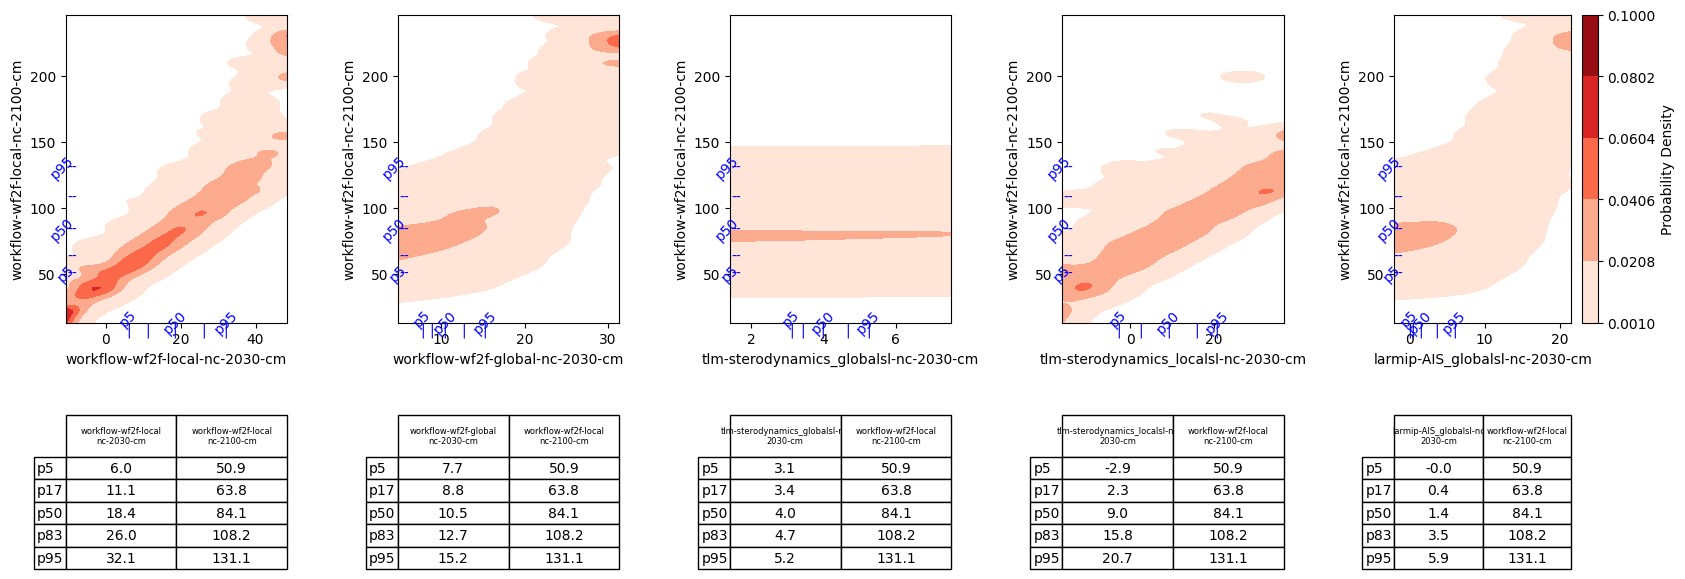

In [12]:
import cond_dist as cd
cd.PLOTkde([normalized_density_values1a, normalized_density_values1b, normalized_density_values1c, normalized_density_values1d, normalized_density_values1e], 
           [xgrid1a, xgrid1b, xgrid1c, xgrid1d, xgrid1e], 
           [ygrid1a, ygrid1b, ygrid1c, ygrid1d, ygrid1e],
           [xp1a, xp1b, xp1c, xp1d, xp1e],
           [yp1a,yp1b,yp1c,yp1d,yp1e],
           [datNMEa,datNMEb,datNMEc,datNMEd,datNMEe], 
           np.linspace(0.001, 0.1, 6),
           table=1)

* percentiles are calculated from the original distribution. 

In [10]:
# column_sums = np.sum(normalized_density_values1c, axis=0)
# plt.plot(column_sums,'.',markersize=.25,color='black')
# plt.ylim(0.999, 1.001)
# print('Check the normalization by summing.')

<hr style="position: absolute; left: 1.5; width: 50%; height: 2px; background-color: blue; border-style: solid;"><br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Plot:: Constrain to percentile values. 
</span>
<p span style="font-family: 'Times New Roman'; font-size: 10pt; color: green;">Plot conditional distribution for specific X (5-95 percentile) .</p>

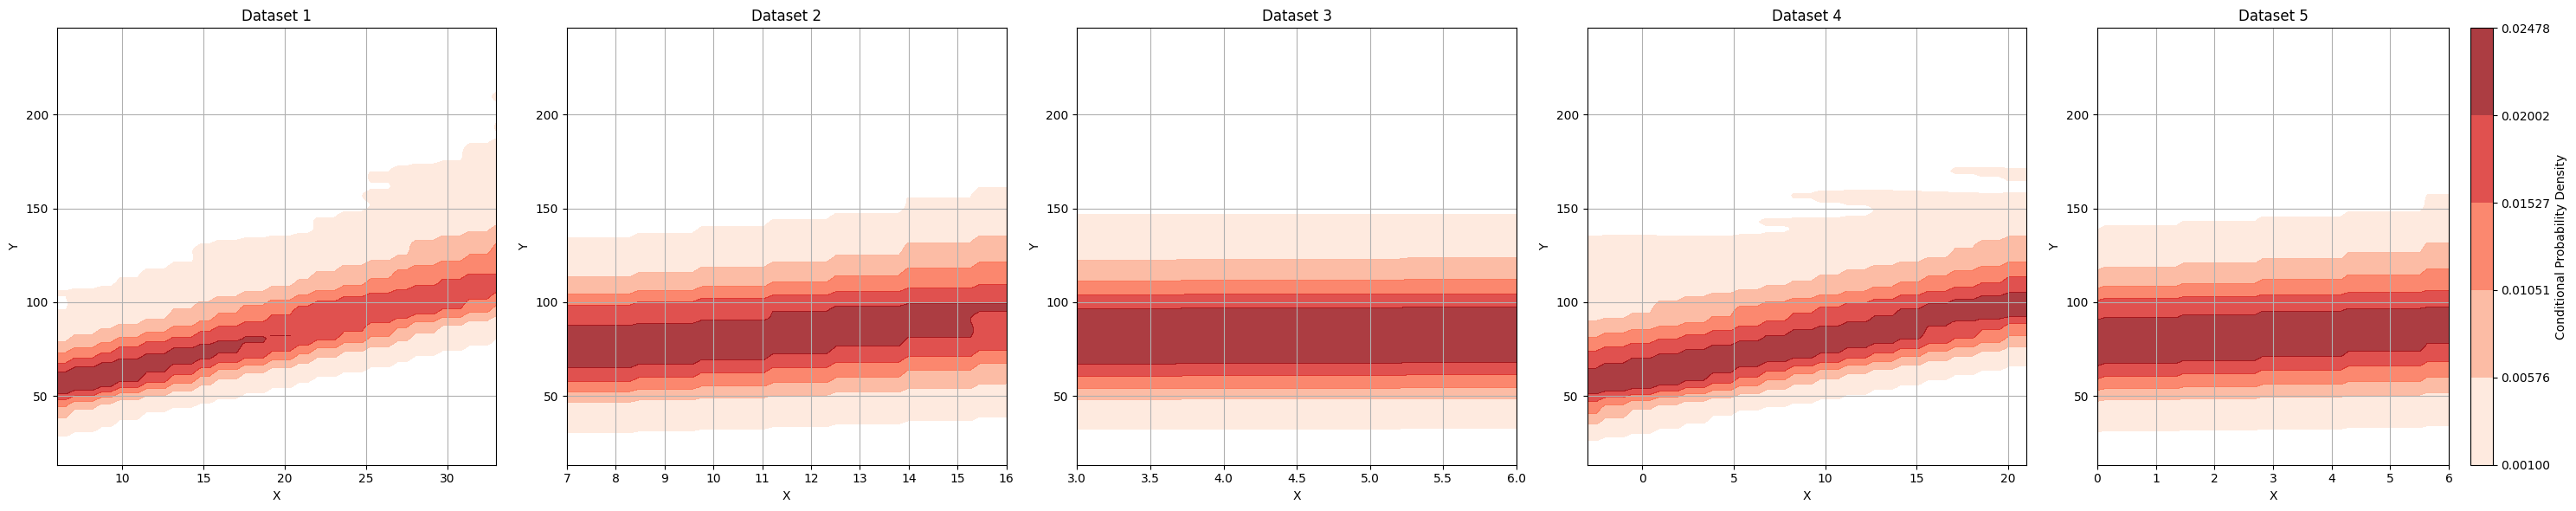

In [11]:
x_values = [(6, 33, 50), (7, 16, 50), (3, 6, 50), (-3, 21, 50), (0, 6, 50)]
# y_limits = [(50, 131), (51, 131), (51, 131), (51, 131), (51, 131)]

cd.PLOTcondProb([density_values1a, density_values1b, density_values1c, density_values1d, density_values1e], 
           [xgrid1a, xgrid1b, xgrid1c, xgrid1d, xgrid1e], 
           [ygrid1a, ygrid1b, ygrid1c, ygrid1d, ygrid1e],
           x_values)

* x values are 5 - 95th percentiles

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<span style="font-size: 12pt; color: blue; font-family: 'Times New Roman';"> SCRATCH </span>  

<br><br><br><br>

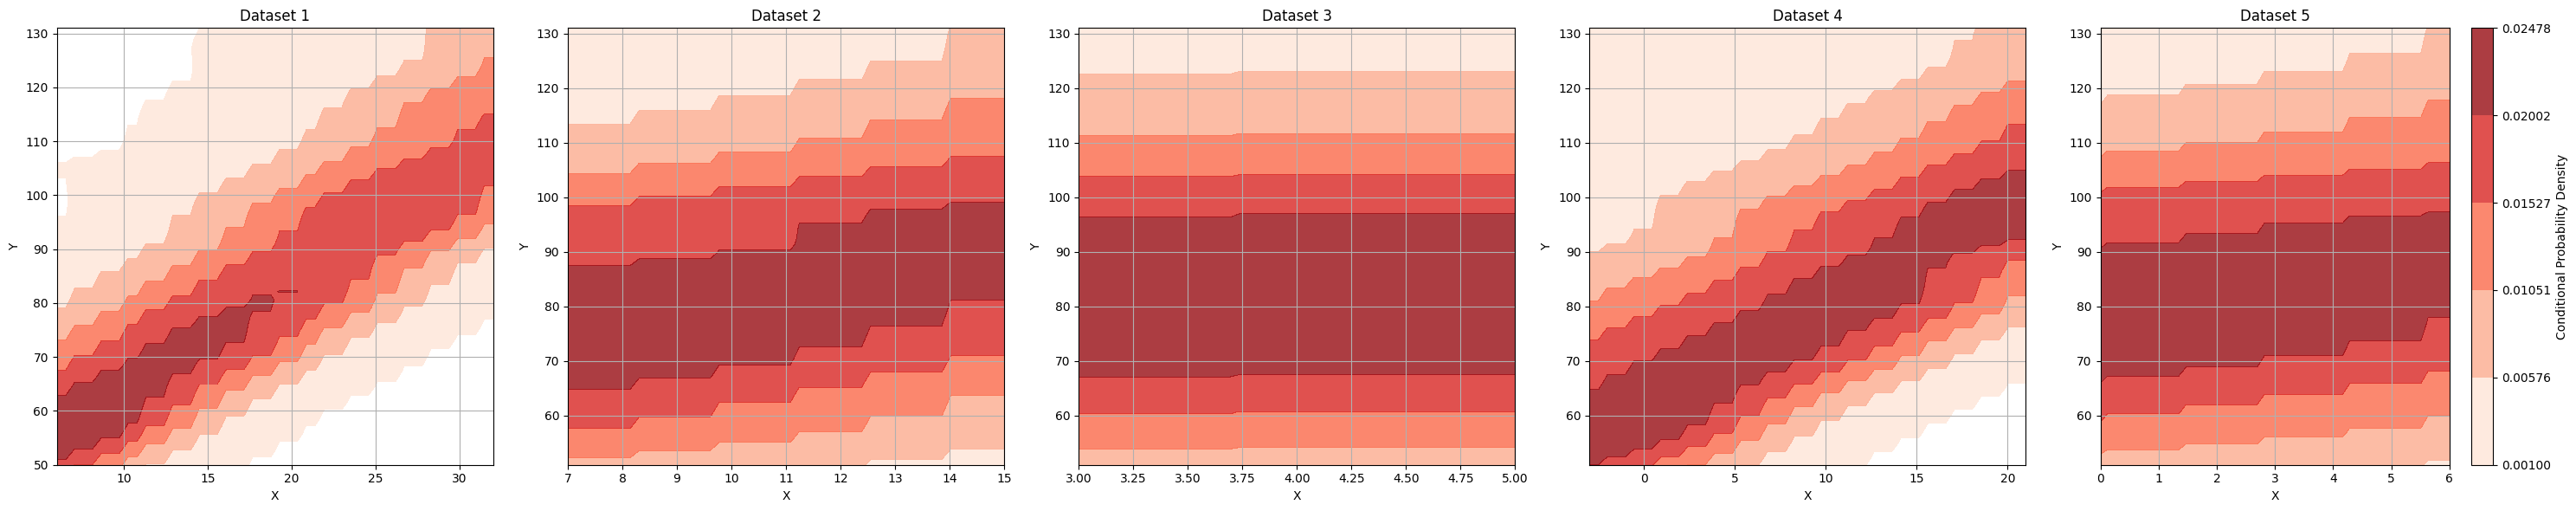

In [14]:
x_values = [(6, 32, 50), (7, 15, 50), (3, 5, 50), (-3, 21, 50), (0, 6, 50)]
y_limits = [(50, 131), (51, 131), (51, 131), (51, 131), (51, 131)]

cd.PLOTcondProb([normalized_density_values1a, normalized_density_values1b, normalized_density_values1c, normalized_density_values1d, normalized_density_values1e], 
           [xgrid1a, xgrid1b, xgrid1c, xgrid1d, xgrid1e], 
           [ygrid1a, ygrid1b, ygrid1c, ygrid1d, ygrid1e],
           x_values, y_limits)

/var/folders/gp/3_y9nhmx1_q9m81jy_j7f8ddyrdbs6/T/ipykernel_59296/2386612138.py:27: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/gp/3_y9nhmx1_q9m81jy_j7f8ddyrdbs6/T/ipykernel_59296/2386612138.py:27: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(
/var/folders/gp/3_y9nhmx1_q9m81jy_j7f8ddyrdbs6/T/ipykernel_59296/2386612138.py:27: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/gp/3_y9nhmx1_q9m81jy_j7f8ddyrdbs6/T/ipykernel_59296/2386612138.py:27: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but 

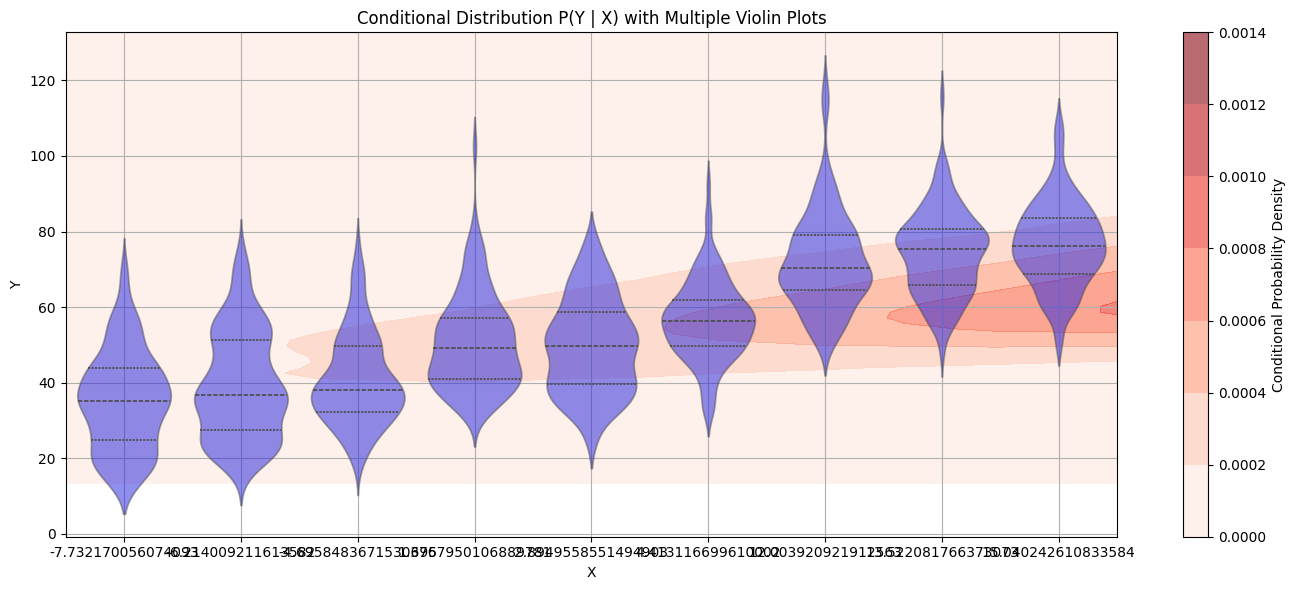

In [16]:
import seaborn as sns
# Adjust the example to fit the available grid size

# Ensure we use valid ranges based on the xgrid size (20 columns)
x_range_groups = [np.arange(2, 5), np.arange(8, 11), np.arange(15, 18)]  # Adjusted ranges

# Prepare data for each range and flatten for violin plotting
violin_data = []
sampled_x_values = []

for x_indices in x_range_groups:
    for idx in x_indices:
        densities = density_values1a[:, idx]
        y_samples = np.random.choice(ygrid1a, size=100, p=densities / densities.sum())  # Generate Y samples
        violin_data.append(y_samples)
        sampled_x_values.append(xgrid1a[idx])

# Plot the conditional distribution with multiple violin plots
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the contour plot for conditional densities
contour = ax.contourf(xgrid1a, ygrid1a, density_values1a, cmap='Reds', alpha=0.6, zorder=1)
fig.colorbar(contour, ax=ax, label='Conditional Probability Density')

# Overlay multiple violin plots at corresponding X positions
for i, x_val in enumerate(sampled_x_values):
    sns.violinplot(
        y=violin_data[i],  # Data for each violin
        x=[x_val] * len(violin_data[i]),  # Control X-axis positions
        bw=0.3,  # Bandwidth for smoothing
        inner='quartile',  # Show quartiles inside the violins
        scale='width',  # Adjust the size of the violins
        color='blue',  # Set violin color
        alpha=0.5,  # Transparency to let contours show
        ax=ax,  # Add to existing axis
        zorder=2  # Ensure violins are above contour
    )

# Labels and formatting
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Conditional Distribution P(Y | X) with Multiple Violin Plots')
ax.grid(True)

plt.tight_layout()
plt.show()

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of X values to consider
x_values = np.linspace(0, 10, 50)  # 50 points between 0 and 10

# Prepare an array to hold the conditional densities for each X value
conditional_densities = np.zeros((len(ygrid), len(x_values)))

# Loop through each chosen X value
for i, chosen_x in enumerate(x_values):
    # Find the closest index for chosen_x in xgrid
    x_idx = np.abs(xgrid - chosen_x).argmin()
    
    # Extract the joint density values at this X value
    joint_density_at_x = normalized_density_values[:, x_idx]
    
    # Calculate the marginal density for this X value (sum over Y)
    marginal_density_x = np.sum(joint_density_at_x)
    
    # Compute the conditional density P(Y|X)
    conditional_density_y_given_x = joint_density_at_x / marginal_density_x
    
    # Store the conditional density for this X value
    conditional_densities[:, i] = conditional_density_y_given_x

# Create a plot to show the conditional densities
plt.figure(figsize=(10, 6))
X, Y = np.meshgrid(x_values, ygrid)
plt.contourf(X, Y, conditional_densities, cmap='Reds', levels=20, alpha=0.8)
plt.colorbar(label='Probability Density')
plt.title('Conditional Distribution P(Y|X) across X values')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(0,100)
plt.grid(True)
plt.show()


NameError: name 'ygrid' is not defined

In [ ]:
column_sums = np.sum(conditional_densities, axis=0)
plt.plot(column_sums,'.',markersize=.25,color='black')
plt.ylim(0.999, 1.001)

In [ ]:
import numpy as np

def ptile(inDATA,percentile,axis):
    percentiles = np.percentile(inDATA, [percentile], axis=axis)
    # Find the row indices that are closest to the 17th percentiles for each column
    row_indices = np.argmin(np.abs(inDATA - percentiles), axis=axis)
    
    # Extract the values corresponding to these indices
    corresponding_values = inDATA[row_indices, np.arange(inDATA.shape[axis])]
    
    # Create a zero matrix with the same shape as inDATA
    result_matrix = np.zeros_like(inDATA)

    if axis == 0:
        # Assign the corresponding values to the result matrix
        result_matrix[row_indices, np.arange(inDATA.shape[1])] = inDATA[row_indices, np.arange(inDATA.shape[1])]
    else:
        # Assign the corresponding values to the result matrix for axis=1
        result_matrix[np.arange(inDATA.shape[0]), row_indices] = inDATA[np.arange(inDATA.shape[0]), row_indices]

    return percentiles, row_indices, result_matrix



In [ ]:
p17, pos17,res17 = ptile(normalized_density_values, 17, 0)
p50, pos50,res50 = ptile(normalized_density_values, 50, 0)
p83, pos83,res83 = ptile(normalized_density_values, 83, 0)
p99, pos99,res99 = ptile(normalized_density_values, 99, 0)

In [ ]:
# xaxis = np.linspace(1, 100, 100)
plt.plot(np.squeeze(pos17),np.squeeze(p17),'o') 
plt.plot(np.squeeze(pos50),np.squeeze(p50),'.') 
plt.plot(np.squeeze(pos83),np.squeeze(p83),'x')
plt.plot(np.squeeze(pos99),np.squeeze(p99),'*') 
# plt.ylim(0.0999, 1.001)

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
ax=axs[0]

clevels=np.linspace(0.001,0.2,6)
clabels=np.round(clevels,decimals=3).astype('str')
contour=ax.contourf(Xgrid, Ygrid, normalized_density_values,levels=clevels,cmap='Blues')
# contour=ax.contourf(Xgrid, Ygrid, res17,levels=clevels,cmap='Reds')
# contour=ax.contourf(Xgrid, Ygrid, res50,levels=clevels,cmap='Reds')
contour=ax.contourf(Xgrid, Ygrid, res83,levels=clevels,cmap='Reds')
# contour=ax.contour(Xgrid, Ygrid, res50,levels=clevels,colors='black')

## Add labels to the contour lines
ax.clabel(contour, inline=True, fontsize=2, fmt='%1.4f')


# remove other subaxis.
for i in [1, 2, 3]: axs[i].set_visible(False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of X values to consider (0, 5, 10)
x_values = np.arange(0, 21, 5)

# Create a plot for the conditional distributions
plt.figure(figsize=(12, 6))

# Loop through each chosen X value
for chosen_x in x_values:
    # Find the closest index for chosen_x in xgrid
    x_idx = np.abs(xgrid1a - chosen_x).argmin()

    # Extract the joint density values at this X value
    joint_density_at_x = normalized_density_values1a[:, x_idx]

    # Calculate the marginal density for this X value (sum over Y)
    marginal_density_x = np.sum(joint_density_at_x)

    # Compute the conditional density P(Y|X)
    conditional_density_y_given_x = joint_density_at_x / marginal_density_x

    # Plot the conditional density with a shaded area
    plt.fill_between(ygrid1a, conditional_density_y_given_x, alpha=0.4, label=f'X={chosen_x}')
    plt.plot(ygrid1a, conditional_density_y_given_x, linewidth=2)

# Add labels and legend
plt.title('Conditional Distribution P(Y|X) for Different X Values')
plt.xlabel('Y')
plt.ylabel('P(Y|X)')
plt.legend(title='X Values')
plt.grid(True)
plt.show()
